In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [105]:
figure_dir = '../../figures/fig2/'

In [108]:
# load data
horm_beh = np.load('../../data/processed/compounds_aligned_speed.npy', allow_pickle=True).item()
X1m = horm_beh['X1m'].T
X1a = horm_beh['X1a'].T
X2m = horm_beh['X2m'].T
X2a = horm_beh['X2a'].T
X3 = horm_beh['X3'].T
y1m = horm_beh['y1m']
y1a = horm_beh['y1a']
y2m = horm_beh['y2m']
y2a = horm_beh['y2a']
y3 = horm_beh['y3']
common_comps = horm_beh['common_comps']

In [109]:
# robust z-score for each individual animal first
def robust_zscore(data, axis=0, log_transform=False, exclude_outliers=False, z_transform=True):
    if log_transform:
        data = np.log(data)
    median = np.nanmedian(data, axis=axis)
    mad = np.nanmedian(np.abs(data - median), axis=axis)
    if z_transform:
        zscore = (data - median) / mad
    else:
        zscore = data - median
    if exclude_outliers:
        zscore[np.abs(zscore) > 3] = np.nan
    return zscore

X1 = robust_zscore(np.concatenate([X1m, X1a], axis=0), log_transform=False)
X2 = robust_zscore(np.concatenate([X2m, X2a], axis=0), log_transform=False)
X3 = robust_zscore(X3, log_transform=False)

y1 = np.concatenate([y1m, y1a], axis=0)
y2 = np.concatenate([y2m, y2a], axis=0)
y3 = y3

# concatenate data
X = np.concatenate([X1, X2, X3], axis=0)
y = robust_zscore(np.concatenate([y1m, y1a, y2m, y2a, y3], axis=0), log_transform=True, z_transform=False)
n_samples, n_features = X.shape

In [147]:
# spearman R cross correlation
def spearman_ccf(x, y, max_lag):
    lags = np.arange(-max_lag+1, max_lag)
    ccf = [spearmanr(x[max_lag+lag:-max_lag+lag], 
                     y[max_lag: -max_lag])[0] for lag in lags]
    return lags, ccf

def plot_ccf(idx, max_lag=8):
    lags, ccf = spearman_ccf(X[:,idx],y,max_lag)
    plt.stem(np.array(lags*7.5), ccf,linefmt='grey')
    plt.xlabel('Lag (min)')
    plt.ylabel('Spearman R')
    plt.axvline(0, color='k', ls='--')
    plt.title(f'{common_comps[idx]}')
    # remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # remove background white squares
    plt.gca().set_facecolor('none')
    
def plot_speed_compound(name): # use X3, y3 as specific example throughout
    idx = common_comps.index(name)
    plt.plot(X3[:, idx], label=common_comps[idx])
    plt.ylabel('Log Dansyl ratio')
    # remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(ticks=np.arange(0, 7)*10, labels=np.arange(0, 7)*75)
    plt.xlabel('Time (min)')

    # remove background white squares
    plt.gca().set_facecolor('none')
    plt.twinx()
    plt.plot(0,0,label=name)
    plt.plot(y3, c='red', alpha=0.3, ls='--', label='Locomot.')
    plt.legend()
    
    plt.ylabel('avg. speed (cm/sec)')
    # remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    # remove background white squares
    plt.gca().set_facecolor('none')

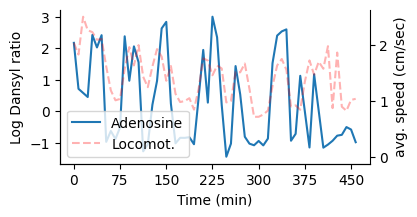

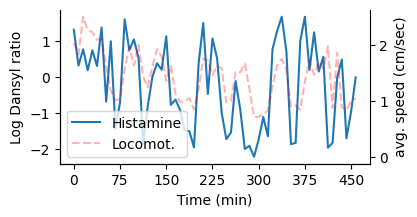

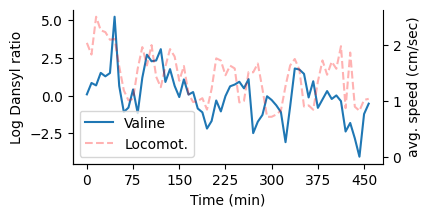

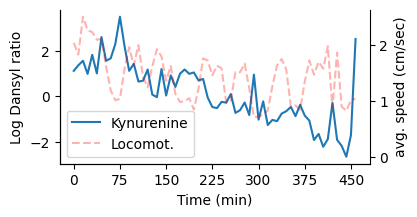

In [149]:
# adenosine, histamine, valine, kynurenine
plt.figure(figsize=(4, 2))
plot_speed_compound('Adenosine')
plt.savefig(figure_dir+'adenosine_speed.pdf', dpi=300)
plt.figure(figsize=(4, 2))
plot_speed_compound('Histamine')
plt.savefig(figure_dir+'histamine_speed.pdf', dpi=300)
plt.figure(figsize=(4, 2))
plot_speed_compound('Valine')
plt.savefig(figure_dir+'valine_speed.pdf', dpi=300)
plt.figure(figsize=(4, 2))
plot_speed_compound('Kynurenine')
plt.savefig(figure_dir+'kynurenine_speed.pdf', dpi=300)

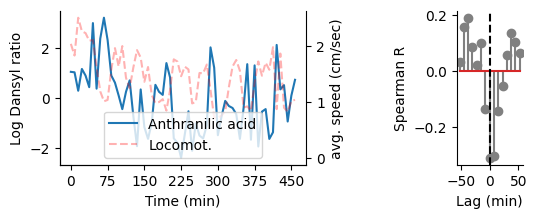

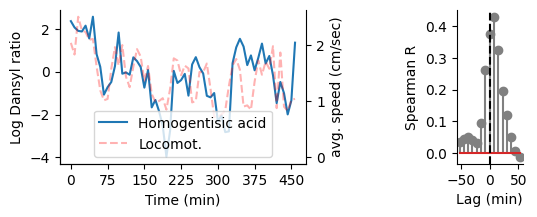

In [150]:
# plot anthranilic acid
plt.figure(figsize=(7, 2))
plt.subplot(1,2,1)
plot_speed_compound('Anthranilic acid')
plt.subplot(176)
anthr_idx = common_comps.index('Anthranilic acid')
plot_ccf(anthr_idx)
plt.title('')
plt.savefig(figure_dir+'anthranilic_acid_speed.pdf', dpi=300)

# homogentistic acid
plt.figure(figsize=(7, 2))
plt.subplot(1,2,1)
plot_speed_compound('Homogentisic acid')
plt.subplot(176)
hga_idx = common_comps.index('Homogentisic acid')
plot_ccf(hga_idx)
plt.title('')
plt.savefig(figure_dir+'homogentisic_acid_speed.pdf', dpi=300)

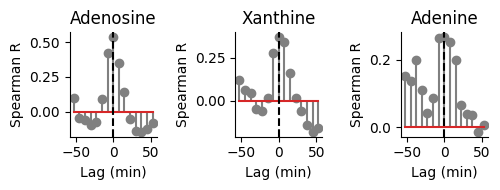

In [151]:
# plot cross correlogram of xhantine, adenosine, and adenine with behavior
plt.figure(figsize=(5, 2))
plt.subplot(131)
adenosine_idx = common_comps.index('Adenosine')
plot_ccf(adenosine_idx)
plt.subplot(132)
xanthine_idx = common_comps.index('Xanthine')
plot_ccf(xanthine_idx)
plt.subplot(133)
adenine_idx = common_comps.index('Adenine')
plot_ccf(adenine_idx)
plt.tight_layout()
plt.savefig(figure_dir+'purines_speed_ccf.pdf', dpi=300)
plt.show()

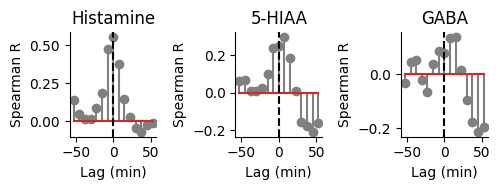

In [152]:
# plot cross_corr of serotonin, histamine, and 5hiaa 
plt.figure(figsize=(5, 2))
plt.subplot(131)
serotonin_idx = common_comps.index('Histamine')
plot_ccf(serotonin_idx)
plt.subplot(132)
histamine_idx = common_comps.index('5-Hydroxyindoleacetic acid')
plot_ccf(histamine_idx)
plt.title('5-HIAA')
plt.subplot(133)
five_hiaa_idx = common_comps.index('gamma-Aminobutyric acid')
plot_ccf(five_hiaa_idx)
plt.title('GABA')
plt.tight_layout()
plt.savefig(figure_dir+'histamine_5hiaa_gaba_ccf.pdf', dpi=300)
plt.show()

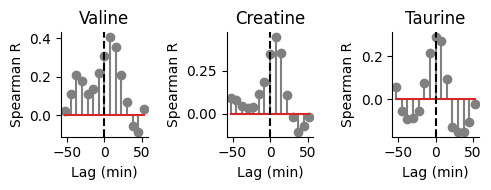

In [153]:
# plot cross corr for valine, creatine, taurine
plt.figure(figsize=(5, 2))
plt.subplot(131)
valine_idx = common_comps.index('Valine')
plot_ccf(valine_idx)
plt.subplot(132)
creatine_idx = common_comps.index('Creatine')
plot_ccf(creatine_idx)
plt.subplot(133)
taurine_idx = common_comps.index('Taurine')
plot_ccf(taurine_idx)
plt.tight_layout()
plt.savefig(figure_dir+'val_cre_taur_ccf.pdf', dpi=300)
plt.show()

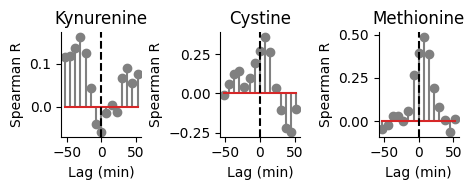

In [157]:
# n formyl kynurenine, cystine, methionine
plt.figure(figsize=(5, 2))
plt.subplot(131)
nformylkynurenine_idx = common_comps.index('Kynurenine')
plot_ccf(nformylkynurenine_idx)
plt.subplot(132)
cystine_idx = common_comps.index('Cystine')
plot_ccf(cystine_idx)
plt.subplot(133)
methionine_idx = common_comps.index('Methionine')
plot_ccf(methionine_idx)
plt.tight_layout()
plt.savefig(figure_dir+'kynurenine_cystine_methionine_ccf.pdf', dpi=300)
plt.show()

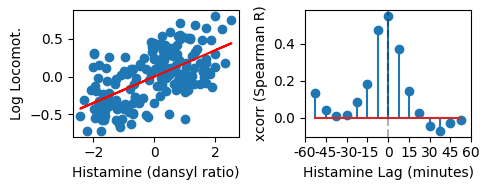

In [71]:

plt.figure(figsize=(5, 2))
plt.subplot(121)
plt.scatter(X[:, histamine_idx], y)
# add regression line
m, b = np.polyfit(X[:, histamine_idx], y, 1)
plt.plot(X[:, histamine_idx], m*X[:, histamine_idx] + b, color='red')
plt.xlabel('Histamine (dansyl ratio)')
plt.ylabel('Log Locomot.')

plt.subplot(122)
# plt.xcorr(np.log(X[:, histamine_idx]), np.log(y),maxlags=8)
lags, rs = spearman_ccf(X[:, histamine_idx], y, max_lag=8)
plt.stem(lags, rs)
plt.axvline(0, color='k', linestyle='--',alpha=0.3)
plt.xticks(np.arange(-8, 9, 2), labels=(np.arange(-8, 9, 2)*7.5).astype(int))   
plt.xlabel('Histamine Lag (minutes)')
plt.ylabel('xcorr (Spearman R)')
plt.tight_layout()
# # plt.savefig('histamine_lagged_corr.pdf', dpi=300)

In [158]:
# compute all ccgs
all_ccgs = {}
for i, comp in enumerate(common_comps):
    lags, rs = spearman_ccf(X[:, i], y, max_lag=8)
    all_ccgs[comp] = (lags, rs)

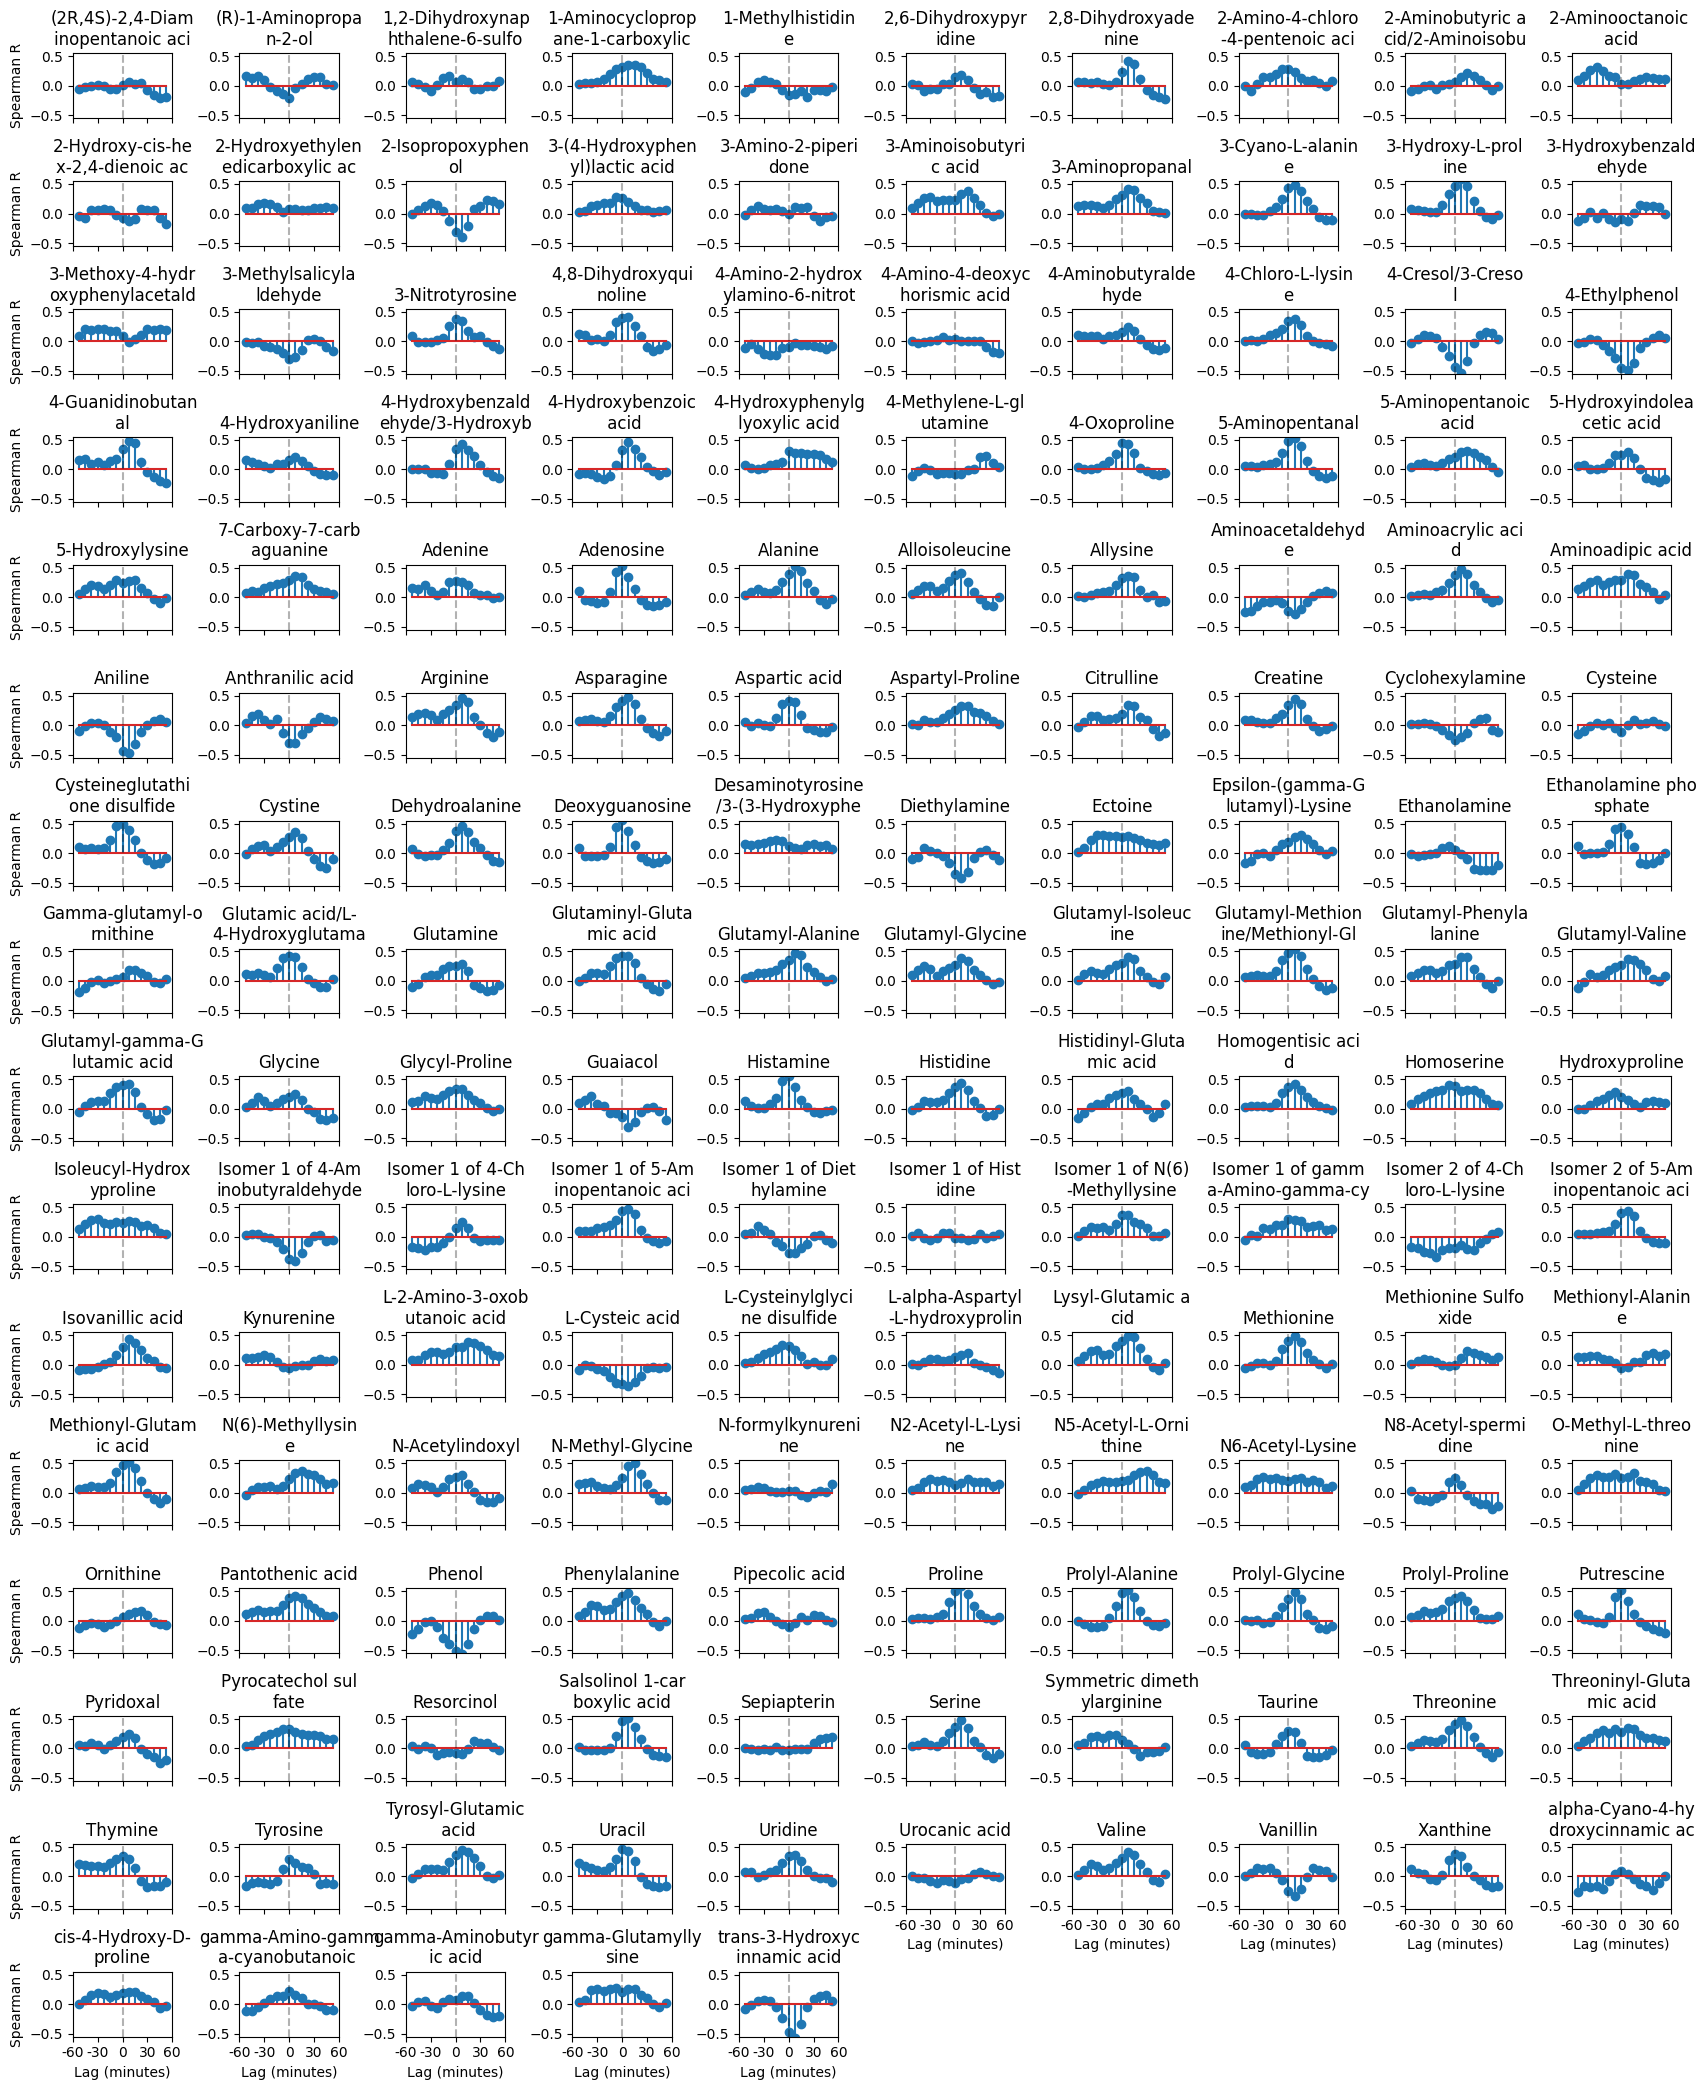

In [ ]:
# plot all the spearman cross-correlations
plt.figure(figsize=(17  , 21))
for i, comp in enumerate(common_comps):
    plt.subplot(16, 10, i+1)
    lags, rs = all_ccgs[comp]
    plt.stem(lags, rs)
    plt.xticks(np.arange(-8, 9, 4), labels=[])   
    # plt.xlabel('Lag (minutes)')
    if i > 144:
        plt.xlabel('Lag (minutes)')
        plt.xticks(np.arange(-8, 9, 4), labels=[-60, -30, 0, 30, 60])   

    if i % 10 == 0:
        plt.ylabel('Spearman R')
    if len(comp) > 16:
        plt.title(comp[:16] + '\n' + comp[16:32])
    else:
        plt.title(comp)
    plt.ylim(-0.55, 0.55)
    plt.axvline(0, color='k', linestyle='--',alpha=0.3)
plt.tight_layout()
plt.savefig(figure_dir+'all_compound_speed_ccf.svg',dpi=300)
plt.show()

# high vs low locomotion periods

Text(0, 0.5, 'Locomotion (log z-score)')

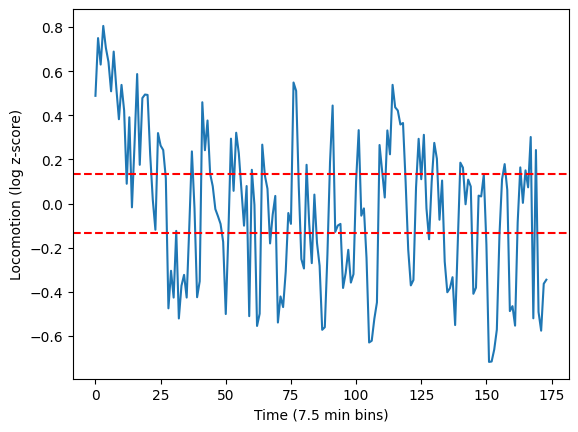

In [167]:
plt.plot(y)
y_med = np.median(y)
y_abd = np.median(np.abs(y - y_med))
plt.axhline(y_med - y_abd/2, color='r', linestyle='--')
plt.axhline(y_med + y_abd/2, color='r', linestyle='--')
plt.xlabel('Time (7.5 min bins)')
plt.ylabel('Locomotion (log z-score)')

In [162]:
from scipy.ndimage import label
# take periods where y is above median for more than one lag
above_med = y > y_med
# find contiguous regions where above_med is True
labeled, n_labels = label(above_med)
# find lengths of each labeled region
lengths = np.bincount(labeled)[1:]  # skip background count at index 0
# find labels of regions longer than 1 lag
long_labels = np.where(lengths > 2)[0] + 1  # skip background label 0
# create mask for long regions
mask_run = np.isin(labeled, long_labels)

# take periods where y is below median for more than one lag
below_med = y < y_med - y_abd/2
# find contiguous regions where below_med is True
labeled, n_labels = label(below_med)
# find lengths of each labeled region
lengths = np.bincount(labeled)[1:]  # skip background count at index 0
# find labels of regions longer than 1 lag
long_labels = np.where(lengths > 2)[0] + 1  # skip background label 0
# create mask for long regions
mask_sleep = np.isin(labeled, long_labels)

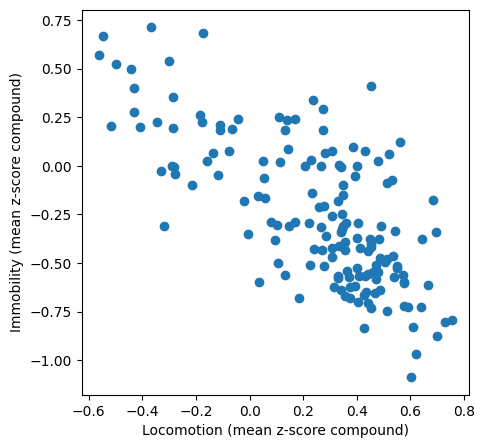

In [166]:
# zscore each row of X
X_z = (X - X.mean(axis=0)) / X.std(axis=0)
X_run = X_z[mask_run]
X_sleep = X_z[mask_sleep]
X_run_mean = np.median(X_run, axis=0)
X_sleep_mean = np.median(X_sleep, axis=0)
# plot run vs sleep means
plt.figure(figsize=(5, 5))
plt.scatter(X_run_mean, X_sleep_mean)
plt.xlabel('Locomotion (mean z-score compound)')
plt.ylabel('Immobility (mean z-score compound)')
plt.savefig(figure_dir+'run_vs_sleep_metabolites.svg', dpi=300)

In [87]:
# extract the 20 ones that are highest in run and lowest in sleep
diff = X_run_mean - X_sleep_mean
top5_run = np.argsort(diff)[-20:]
top5_sleep = np.argsort(diff)[:20]
# plot compound names (reverse order)
np.array(common_comps)[top5_run][::-1], np.array(common_comps)[top5_sleep][::-1]

(array(['Histamine', '5-Aminopentanal', 'Cysteineglutathione disulfide',
        'Salsolinol 1-carboxylic acid', '3-Hydroxy-L-proline', 'Proline',
        'Prolyl-Alanine', 'Homogentisic acid',
        'Isomer 2 of 5-Aminopentanoic acid',
        'Isomer 1 of 5-Aminopentanoic acid', 'Isovanillic acid', 'Uracil',
        'Putrescine', 'Threoninyl-Glutamic acid', '4-Guanidinobutanal',
        'Glutamyl-Methionine/Methionyl-Glutamic acid', 'Deoxyguanosine',
        'Asparagine', 'Arginine', 'Alanine'], dtype='<U65'),
 array(['Urocanic acid', 'Sepiapterin', 'Aminoacetaldehyde', 'Guaiacol',
        '1-Methylhistidine', 'Vanillin', 'Isomer 2 of 4-Chloro-L-lysine',
        'Cyclohexylamine', 'Isomer 1 of 4-Aminobutyraldehyde',
        'L-Cysteic acid', '3-Methylsalicylaldehyde', 'Diethylamine',
        'Isomer 1 of Diethylamine', 'Anthranilic acid', 'Phenol',
        '4-Ethylphenol', '4-Cresol/3-Cresol', '2-Isopropoxyphenol',
        'Aniline', 'trans-3-Hydroxycinnamic acid'], dtype='<U65'))